# Fresnel propagation through a HST-style system using TOLIMAN parameters

The Fresnel propagation code was causing various crashes when I dived straight into it. As an interim measure I used the example HST code, plugging in the parameters from Eduardo's Ritchey-Chrétien design.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import poppy
from poppy.poppy_core import PlaneType
import astropy.units as u
import astropy.io.fits as fits

	Entrance pupil diam:  0.3 m	npix: 1024	Beam ratio:0.5
	Optic: Circle, radius=0.15 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  0.559337630333726 m
	Lens: Primary, with focal length 0.5717255 m
	Propagation distance:  0.559337630333726 m
	Lens: Secondary, with focal length -0.02337895948639565 m
	Propagation distance:  0.589999999989853 m
	Image plane: focus (Analytic)


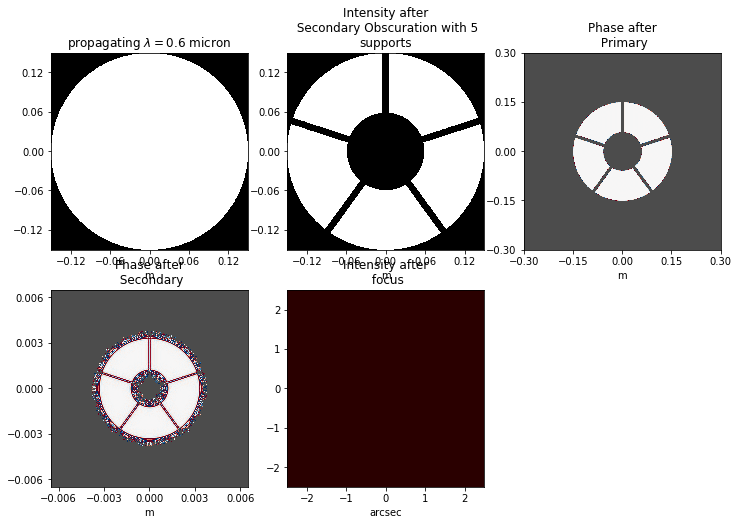

In [2]:
# Values from Eduardo's RC Toliman system
diam = 0.3 * u.m
m1_fl = 0.5*1.143451 * u.m
m1_m2_sep = 0.559337630333726 * u.m
m2_fl = -0.5*0.0467579189727913 * u.m
m2_focus_sep = 0.589999999989853 * u.m
m2_rad = 0.059 * u.m
m2_strut_width = 0.01 * u.m
m2_supports = 5
epsilon = 0.0 * u.m

tol = poppy.FresnelOpticalSystem(pupil_diameter=diam, npix=1024, beam_ratio=0.5) #25)
m1 = poppy.QuadraticLens(m1_fl, name='Primary')
m2 = poppy.QuadraticLens(m2_fl, name='Secondary')

tol.add_optic(poppy.CircularAperture(radius=diam.value/2))
tol.add_optic(poppy.SecondaryObscuration(secondary_radius=m2_rad,
                                 support_width=m2_strut_width,
                                 support_angle_offset=90, n_supports=m2_supports))
tol.add_optic(m1, distance=m1_m2_sep)
tol.add_optic(m2, distance=m1_m2_sep)
tol.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=m2_focus_sep+epsilon);
#hst.add_detector(distance=0.018*0.528*u.m, pixelscale=); #m2_focus_sep);


tol.describe()
plt.figure(figsize=(12,8))
psf, waves = tol.calcPSF(wavelength=0.6e-6, display_intermediates=True, return_intermediates=True)



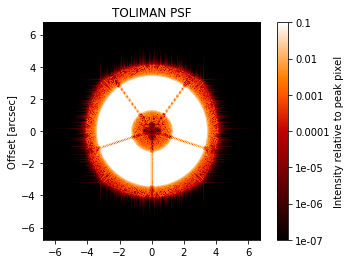

In [3]:
# PSF doesn't show well with normal settings, so the normalization needs to
# be explicitly set to show things properly.
as_per_pixel = 13.52/2048.0
poppy.display_PSF(psf,pixelscale=as_per_pixel, normalize='peak')
plt.title('TOLIMAN PSF')
plt.ylabel("Offset [arcsec]");

	Entrance pupil diam:  2.4 m	npix: 512	Beam ratio:0.25
	Optic: Circle, radius=1.2 m
	Pupil plane: Secondary Obscuration with 5 supports (Analytic)
	Propagation distance:  4.907028205 m
	Lens: Primary, with focal length 5.52085 m
	Propagation distance:  4.907028205 m
	Lens: Secondary, with focal length -0.6790325 m
	Propagation distance:  6.3919974 m
	Image plane: focus (Analytic)


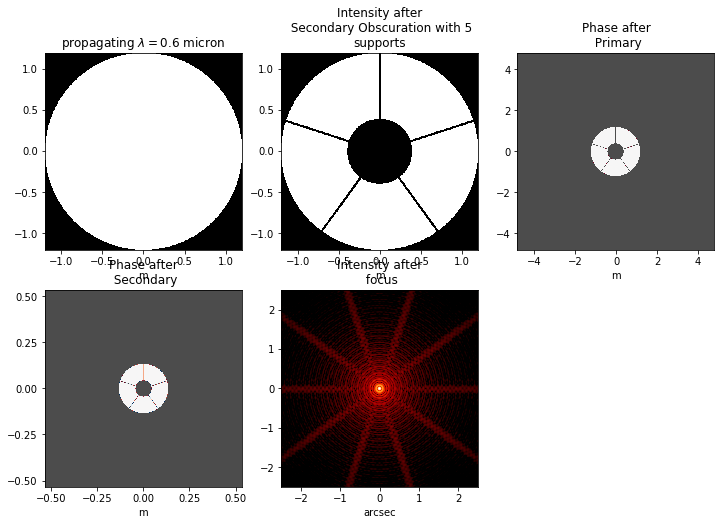

In [4]:
# HST example - Following example in PROPER Manual V2.0 page 49.
hst_diam = 2.4 * u.m
hst_fl_pri = 5.52085 * u.m
hst_m1_m2_sep = 4.907028205 * u.m
hst_fl_sec = -0.6790325 * u.m
hst_m2_focus_sep = 6.3919974 * u.m
hst_m2_rad = 0.396  * u.m

hst = poppy.FresnelOpticalSystem(pupil_diameter=hst_diam, npix=512, beam_ratio=0.25)
hst_m1 = poppy.QuadraticLens(hst_fl_pri, name='Primary')
hst_m2 = poppy.QuadraticLens(hst_fl_sec, name='Secondary')

hst.add_optic(poppy.CircularAperture(radius=hst_diam.value/2))
hst.add_optic(poppy.SecondaryObscuration(secondary_radius=hst_m2_rad,
                                 support_width=0.0264,
                                 support_angle_offset=90.0, n_supports=5))
hst.add_optic(hst_m1, distance=hst_m1_m2_sep)
hst.add_optic(hst_m2, distance=hst_m1_m2_sep)
hst.add_optic(poppy.ScalarTransmission(planetype=PlaneType.image, name='focus'), distance=hst_m2_focus_sep);


hst.describe()

plt.figure(figsize=(12,8))
psf, waves = hst.calcPSF(wavelength=0.6e-6, display_intermediates=True, return_intermediates=True)


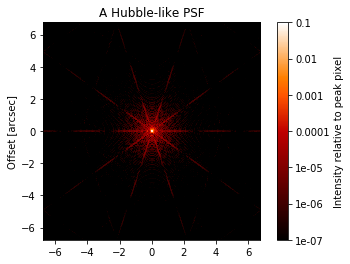

In [5]:
as_per_pixel = 13.52/2048.0
poppy.display_PSF(psf,pixelscale=as_per_pixel, normalize='peak') #imagecrop=1.8)
plt.title('A Hubble-like PSF')
plt.ylabel("Offset [arcsec]");